<a href="https://colab.research.google.com/github/ingridmidory/Inferencia-Est-distica/blob/main/Tarea_2_LinearRegression_MonterrosoAlfaroIngrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

precios = pd.read_csv('https://www.dropbox.com/s/my0o1wyai4r8otn/Base%20de%20datos%20INEGI%20Diaria.csv?dl=1' , encoding='latin-1')

In [ ]:
precios.tail(10)

,Period,D.Ext M.D,Gas_kg,Magna,Premium,Diesel,Crudo_Barril,USD_MXN,C.IPC
5001,16/11/2016,177523.1,13.39,13.98,14.81,14.63,38.201426,20.0371,45315.96094
5002,17/11/2016,177523.1,13.39,13.98,14.81,14.63,38.201426,20.0371,45315.96094
5003,18/11/2016,177523.1,13.39,13.98,14.81,14.63,38.201426,20.0371,45315.96094
5004,22/11/2016,177523.1,13.39,13.98,14.81,14.63,38.201426,20.0371,45315.96094
5005,23/11/2016,177523.1,13.39,13.98,14.81,14.63,38.201426,20.0371,45315.96094
5006,24/11/2016,177523.1,13.39,13.98,14.81,14.63,38.201426,20.0371,45315.96094
5007,25/11/2016,177523.1,13.39,13.98,14.81,14.63,38.201426,20.0371,45315.96094
5008,28/11/2016,177523.1,13.39,13.98,14.81,14.63,38.201426,20.0371,45315.96094
5009,29/11/2016,177523.1,13.39,13.98,14.81,14.63,38.201426,20.0371,45315.96094
5010,30/11/2016,177523.1,13.39,13.98,14.81,14.63,38.201426,20.0371,45315.96094


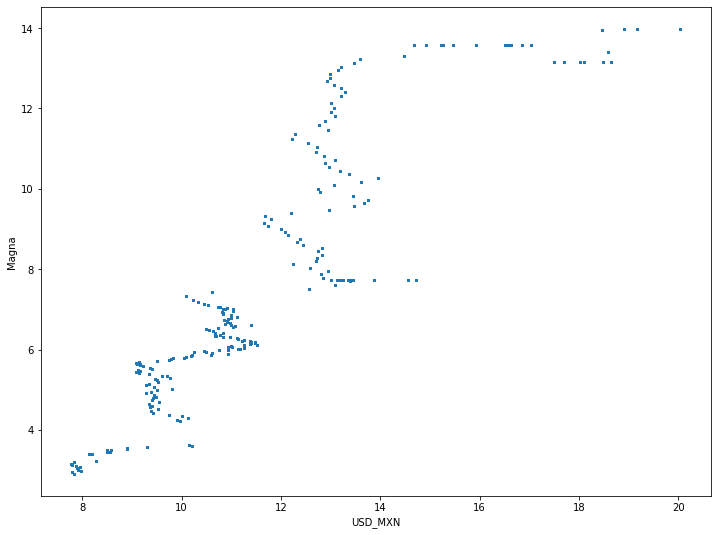

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = precios['USD_MXN']
y = precios['Magna']

x = pd.DataFrame(x)
y = pd.DataFrame(y)

# plot
plt.figure(figsize=(12, 9))
plt.scatter(x,y,s=1.5)
plt.xlabel('USD_MXN')
plt.ylabel('Magna')
plt.show()

Ilustración entre el valor real y estmado

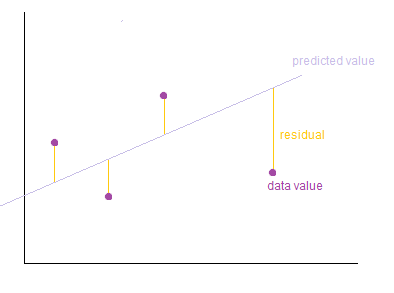

In [ ]:
## https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# imports

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Slope: [[1.13213924]]
Intercept: [-5.50319305]
Root mean squared error:  1.8867649852254333
R2 score:  0.8011742346905473


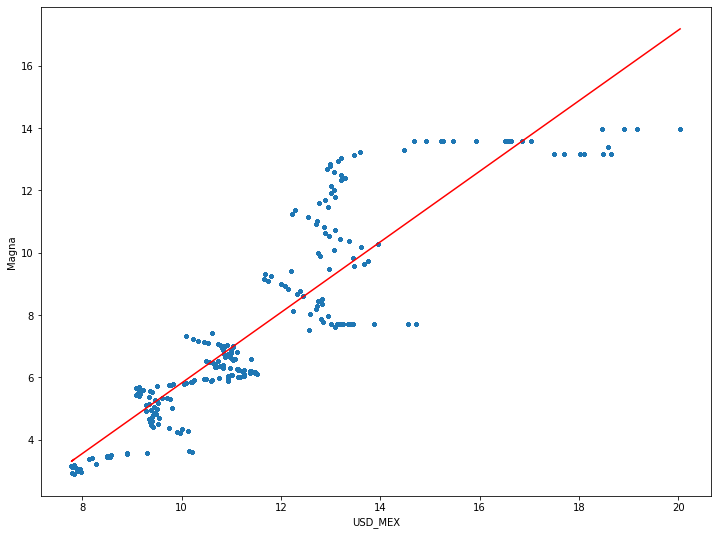

In [ ]:
# sckit-learn implementation
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.figure(figsize=(12, 9))
plt.scatter(x, y, s=10)
plt.xlabel('USD_MEX')
plt.ylabel('Magna')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

**Tarea 2**

---



Regresión Lineal


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
datos = precios['Crudo_Barril']
target = precios['C.IPC']
x_train, x_test, y_train, y_test = map(pd.DataFrame,train_test_split(datos,target, test_size=0.2, random_state=5))

print(x_train)
print(y_train)

      Crudo_Barril
3191     64.734351
2212     48.006953
4721     37.458143
424      10.882881
994      19.911782
...            ...
3046     38.238622
1725     24.934537
4079    102.977620
2254     45.087857
2915    106.637018

[4008 rows x 1 columns]
             C.IPC
3191  29232.240230
2212  15759.730470
4721  44542.761720
424    3569.879883
994    5652.189941
...            ...
3046  17752.179690
1725   8554.480469
4079  44077.089840
2254  17802.710940
2915  26290.990230

[4008 rows x 1 columns]


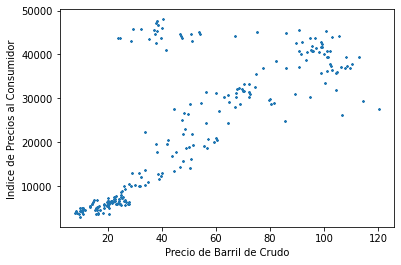

In [ ]:
plt.figure()
plt.scatter(x=x_train, y=y_train, s = 0.5)
plt.xlabel('Precio de Barril de Crudo')
plt.ylabel('Indice de Precios al Consumidor')
plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_predicted = reg.predict(x_test)
print('Coeficientesderegresión:', reg.coef_, reg.intercept_)
print('Coeficientedeterminación: %.2f'%r2_score(y_test, y_predicted) )
print('(RMSE): %.2f'%mean_squared_error(y_test,y_predicted,squared=False))

X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())


Coeficientesderegresión: [[372.08244786]] [3822.10511998]
Coeficientedeterminación: 0.56
(RMSE): 10227.73
                            OLS Regression Results                            
Dep. Variable:                  C.IPC   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     5857.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:31:41   Log-Likelihood:                -42496.
No. Observations:                4008   AIC:                         8.500e+04
Df Residuals:                    4006   BIC:                         8.501e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [ ]:
reg = linear_model.LinearRegression()
datos, target = pd.DataFrame(datos), pd.DataFrame(target)
reg.fit(datos,target)
y_predicted = reg.predict(datos)
print('Coeficientesregresión:', reg.coef_, reg.intercept_)
print('Coeficientedeterminación: %.2f'%r2_score(target, y_predicted) )
print('(RMSE): %.2f'%mean_squared_error(target,y_predicted,squared=False))

X2 = sm.add_constant(datos)
est = sm.OLS(target, X2)
est2 = est.fit()
print(est2.summary())

Coeficientesregresión: [[371.3946099]] [3903.89315085]
Coeficientedeterminación: 0.59
(RMSE): 9838.64
                            OLS Regression Results                            
Dep. Variable:                  C.IPC   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     7143.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:31:41   Log-Likelihood:                -53182.
No. Observations:                5011   AIC:                         1.064e+05
Df Residuals:                    5009   BIC:                         1.064e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

Regresión Lineal Múltiple 

In [ ]:
datos = precios[['Gas_kg','C.IPC','USD_MXN', 'Crudo_Barril']]
target = precios['Magna']
reg = linear_model.LinearRegression()
datos, target = pd.DataFrame(datos), pd.DataFrame(target)
reg.fit(datos,target)
y_predicted = reg.predict(datos)
print('Coeficientesregresión:', reg.coef_, reg.intercept_)
print('Coeficientedeterminación: %.2f'%r2_score(target, y_predicted) )
print('(RMSE): %.2f'%mean_squared_error(target,y_predicted,squared=False))

X2 = sm.add_constant(datos)
est = sm.OLS(target, X2)
est2 = est.fit()
print(est2.summary())

Coeficientesregresión: [[ 4.98342597e-01  7.77842680e-05  1.63557608e-01 -1.35257503e-02]] [0.42213427]
Coeficientedeterminación: 0.94
(RMSE): 0.73
                            OLS Regression Results                            
Dep. Variable:                  Magna   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 2.098e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:31:41   Log-Likelihood:                -5539.3
No. Observations:                5011   AIC:                         1.109e+04
Df Residuals:                    5006   BIC:                         1.112e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      

Matriz de Correlaciones 

                Gas_kg     C.IPC   USD_MXN  Crudo_Barril
Gas_kg        1.000000  0.946258  0.874978      0.668956
C.IPC         0.946258  1.000000  0.819035      0.766688
USD_MXN       0.874978  0.819035  1.000000      0.381345
Crudo_Barril  0.668956  0.766688  0.381345      1.000000


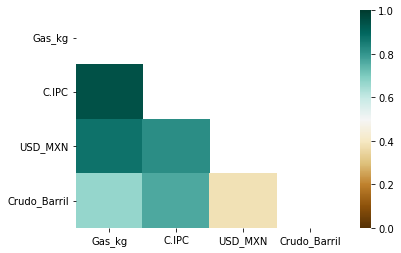

In [ ]:
import seaborn as sb

correlations = datos.corr()

print(correlations)
mask = np.triu(np.ones_like(correlations, dtype=np.bool))
sb.heatmap(correlations, mask=mask, vmin=0,vmax=1, cmap='BrBG')


Predecir Datos 

Slope: [[1.13213924]]
Intercept: [-5.50319305]
Root mean squared error:  1.8867649852254333
R2 score:  0.8011742346905473


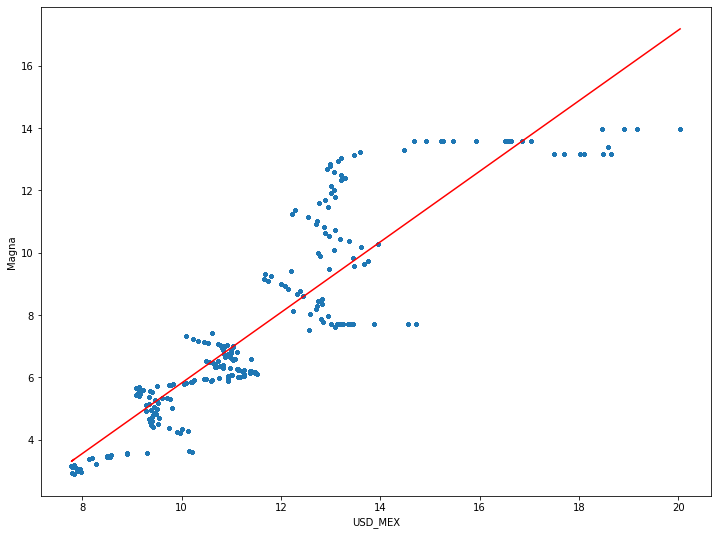

In [ ]:
# sckit-learn implementation
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.figure(figsize=(12, 9))
plt.scatter(x, y, s=10)
plt.xlabel('USD_MEX')
plt.ylabel('Magna')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()